# Clustering with k-Means
By Josh Houlding

Clustering is an unsupervised machine learning method used for grouping similar data in datasets so it can be easily understood and manipulated. One such algorithm, k-means, takes data and learns how it can be grouped. Some real-world examples of its use include fake news identification, fantasy league stat analysis, insurance fraud detection, or customer/market segmentation.

# Part 1

To perform a k-means analysis using the k-means algorithm, complete the following:
1. Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 data sets that are suitable for use in a clustering task. For this part of the exercise, you must choose two of these datasets, provided they include at least 10 attributes and 10,000 instances.
2. Ensure that the datasets are suitable for clustering using these methods.
3. You may search for data in other repositories, such as Data.gov or Kaggle.

# Part 2

For your selected datasets, build a K-means clustering model.
1. Start by choosing the number of clusters. Discuss how you would find the optimal number of clusters that best fits the dataset.
2. Randomly pick k centroids "not necessarily from your dataset" (or points that will be the center of your clusters) in d-space. Try to make them near the data but different from one another.
3. Assign each data point to the closest centroid. This will form your k clusters. Apply the Euclidian distance to form your clusters.
4. Move the centroids to the average location of the data points assigned to it.
5. Repeat the preceding two steps until the assignments do not change or change very little.

<b>Note:</b> A key objective is to minimize the variation within the clusters defined as <b>the sum of squared Euclidean distances between items and the corresponding centroid.</b>

# Part 3

1. Explain the dataset and the type of information you wish to gain by applying a clustering method.
2. Explain the k-means algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).
3. Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.
4. Clean the data and address unusual phenomena (e.g., outliers); use illustrative diagrams and plots and explain them.
5. Formulate two questions that can be answered by performing a clustering analysis using the k-means.
6. Use the elbow method to find the optimal number of clusters for your chosen dataset. Justify your chosen (final) value of k.
7. Perform k-means analysis. Explain the intuition behind each mathematical step.
8. Interpret the results in the context of the questions you asked.
9. Discuss how you minimized the variation within the clusters.
10. Validate your model. Then, explain the results.
11. Include all mathematical formulas used and graphs representing the final outcomes.

# <span style="color:#8080ff">Part 1</span>

# Tasks 1.1-1.3
<b>1.1:</b> <i>Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 data sets that are suitable for use in a clustering task. For this part of the exercise, you must choose two of these datasets, provided they include at least 10 attributes and 10,000 instances.</i> <br>
<b>1.2:</b> <i>Ensure that the datasets are suitable for clustering using these methods.</i> <br>
<b>1.3:</b> <i>You may search for data in other repositories, such as Data.gov or Kaggle.</i>

<b>Dataset Selected:</b> "Online Shoppers Purchasing Intention Dataset" (UCI Machine Learning Repository) <br>
<b>Basic Description:</b> Dataset of online session metrics that can be used to predict a shopper's intent (whether they plan to make a purchase or not).<br>
<b>Link:</b> https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

# <span style="color:#1f6635">Part 2</span>

# Task 2.1
<i>Start by choosing the number of clusters. Discuss how you would find the optimal number of clusters that best fits the dataset.</i>

Choosing the optimal number of clusters is essential for maximizing the effectiveness of a k-means clustering algorithm, as having too few leads to underfitting, where the true underlying structure and granularity of the data is not captured properly, and having too many leads to overfitting, where the model fits to noise in the training dataset and loses generalizability.

<b>Necessary Terminology</b> <br>
* <b>k:</b> The number of clusters. 
* <b>Centroid:</b> The mean of a cluster. 
* <b>Within-Cluster Sum of Squares (WCSS):</b> The sum of squared distances between data points and the centroids of their clusters. 

One common way the optimal cluster count can be found is by using the <b>elbow method</b>, where the WCSS is calculated for each value in a range of k-values (eg. 1 to 10), and each (k, WCSS) point is graphed. Then, the "elbow point" is identified as the point where the decrease in the WCSS levels off sharply, forming an "elbow". The k-value for this elbow point is the optimal number of clusters for this particular clustering problem.

# Task 2.2
<i>2. Randomly pick k centroids "not necessarily from your dataset" (or points that will be the center of your clusters) in d-space. Try to make them near the data but different from one another.</i>

The locations of the initial centroids in k-means clustering are extremely important, as they affect how fast the algorithm converges to the final clusters. Randomly selecting initial centroids can lead to incorrect convergence and thus poor algorithm performance. It is better to find the range of each feature in the dataset (max - min) and use those values in initial centroid placement.

Initial centroids do not have to be from the dataset, but they should be spread out enough to cover a good portion of the data space, and close enough to the data points that convergence happens quickly. The best way to proceed is to assign each centroid to a random location within the range of each feature, ensuring their close proximity to the data, and ensure they are spread out enough to capture the essence of the data. 

The following is a code example of how initial centroids can be selected: 

In [190]:
'''
import numpy as np

# Get number of features
d = len(df.columns)

# Get min and max of each feature
mins = df.min()
maxes = df.max()

k = 5 # Set arbitrary initial number of clusters

# Create empty array to store centroids
initial_centroids = []

# Generate initial centroids
for i in range(k): 
    centroid = []
    for feature in range(d): 
        random_val = np.random.uniform(mins[feature], maxes[feature])
        centroid.append(random_val)
    initial_centroids.append(centroid)

initial_centroids
''';

# Task 2.3
<i>Assign each data point to the closest centroid. This will form your k clusters. Apply the Euclidian distance to form your clusters.</i>

To do this, we need to iterate through each data point. First, we calculate the Euclidean distance between it and every centroid we computed earlier. Then, we assign the data point to the closest centroid. After all data points have been assigned to a centroid, we consider this centroid and all the points assigned to it a complete cluster. 

The Euclidean distance can be computed using this formula: 

$d(\mathbf{x}_i, \mathbf{c}_j) = \sqrt{\sum_{m=1}^{M} (x_{im} - c_{jm})^2}$,

where $x_i$ and $c_j$ are data points, $x_{im}$ and $c_{jm}$ are feature values of $x_i$ and $c_j$, and $M$ is the number of features.

Here is the process illustrated in code. 

In [191]:
'''
# Function for calculating Euclidan distance
def euclidean_distance(point, centroid): 
    return np.sqrt(np.sum((point - centroid) ** 2))

# Assign data points to their closest centroid
def assign_points(data, centroids): 
    clusters = {}
    for i in range(len(centroids)): 
        clusters[i] = []
    
    for idx, data_point in data.iterrows(): 
        distances = [euclidean_distance(data_point.values, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(idx)
        
    return clusters

# Apply cluster assignment
clusters = assign_points(df, initial_centroids)
''';

# Task 2.4
<i>Move the centroids to the average location of the data points assigned to it.</i>

Repositioning the centroids to the average location of their assigned data points is necessary to improve the accuracy of the clusters. This simply involves calculating the mean of the data points in each cluster and reassigning the centroid to it. The following code demonstrates how that can be done. 

This is the formula for updating the centroids:
$\mathbf{c}_j = \frac{1}{|S_j|} \sum_{\mathbf{x}_i \in S_j} \mathbf{x}_i$,

where $c_j$ is the centroid of the $j$th cluster, $S_j$ is the set of points assigned to that cluster, and $x_i$ is the $i$th data point in $S_j$. 

In [192]:
'''
# Function to update centroids
def move_centroids(data, clusters): 
    updated_centroids = []
    for cluster_id, data_indices in clusters.items(): 
        cluster_data = data.iloc[data_indices] # Extract the current cluster's data points
        mean_location = cluster_data.mean() # Get the mean location of data points
        updated_centroids.append(mean_location) # Update centroid location to mean
    return updated_centroids

# Demo usage
centroids = update_centroids(df, clusters)
''';

# Task 2.5
<i>Repeat the preceding two steps until the assignments do not change or change very little.</i>

This part of the k-means clustering algorithm is iterative, meaning it repeats until the convergence criterion is met, IE the amount that centroids or cluster assignments have changed on the latest iteration is less than the threshold below which the algorithm is set to stop. At this point, we consider the clusters to be finalized.

One common way to converge to the optimal clusters is by using the following objective function: 
$J = \sum_{j=1}^{k} \sum_{\mathbf{x}_i \in S_j} \|\mathbf{x}_i - \mathbf{c}_j\|^2$,
where $J$ is the total WCSS, $k$ is the number of clusters, $x_i$ is the $i$th data point, $c_j$ is the centroid of the $j$th cluster, and $S_j$ is the set of data points assigned to that cluster. 

# <span style="color:#D96F52">Part 3</span>

# Task 3.1
<i>Explain the dataset and the type of information you wish to gain by applying a clustering method.</i>
    
These are the description, additional information and variable information provided on the UCI Machine Learning Repository page for the dataset: 

> Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

> The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 
    
> The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
    
A clustering model can be used to uncover numerous insights into online shopping behavior, the most useful of which being customer segmentation, where we can separate customers into distinct segments based on factors like the types of pages visited and the duration and frequency of their visits. This info empowers e-commerce organizations to target marketing strategies and recommendations to individual customers going forward.

# Task 3.2
<i>Explain the k-means algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).</i>

<b>Procedure</b> <br>
As previously detailed, the k-means clustering algorithm works as follows: 
1. Find the optimal value of k from the elbow method. 
2. Randomly select k centroids, then adjust them to be close enough to the data points for quick convergence while still covering most of the data space. 
3. Assign each data point to its closest centroid. 
4. Reassign each centroid to the mean value of the data points assigned to it. 
5. Repeat steps 3 and 4 until convergence is achieved.

<b>Assumptions Made</b>
* Clusters are spherical in shape and evenly sized. 
* The mean of a cluster is an effective measure of centrality (since it is used to determine the centroid's location). 

The k-means clustering algorithm will be useful for grouping customer online shopping sessions, the results of which can be used for customer segmentation and subsequent targeted marketing strategies.

# Task 3.3
<i>Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.</i>

### Loading the data

In [193]:
import pandas as pd

# Load and view data
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Variable Information (from UCI ML Repo page)
* `Administrative`: Number of administrative pages visited.
* `Administrative_Duration`: Time spent on administrative pages (s). 
* `Informational`: Number of informational pages visited.
* `Informational_Duration`: Time spent on informational pages (s). 
* `ProductRelated`: Number of product-related pages visited.
* `ProductRelated_Duration`: Time spent on produce-related pages (s). 
* `BounceRates`: The percentage of visitors on the page who entered the site through it and did not go anywhere else on the site.
* `ExitRates`: The percentage of visitors for whom a visit to that page was the last in that session. 
* `PageValues`: The average value of a page that a user visited before making a purchase. 
* `SpecialDay`: How close the day of the session was to a special day, like Mother's Day or Valentine's Day. 
* `Month`: Which month the session was in.
* `OperatingSystems`: What operating system the visitor was using. 
* `Browser`: What browser the visitor was using. 
* `Region`: The region the user was located in. 
* `TrafficType`: What type of traffic the visitor was (organic, direct, referral, social, paid, etc.)
* `VisitorType`: Whether the user is a returning or new visitor. 
* `Weekend`: Whether the session was on a weekend. 
* `Revenue`: Whether the session involved a purchase or not. 

### Renaming columns

In [194]:
df.columns # Show current column names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [195]:
# Create new names for columns
new_column_mapping = {"Administrative": "admin", "Administrative_Duration": "admin_duration", "Informational": "info",
                      "Informational_Duration": "info_duration", "ProductRelated": "productrelated",
                      "ProductRelated_Duration": "productrelated_duration", "BounceRates": "bounce_rates",
                      "ExitRates": "exit_rates", "PageValues": "page_values", "SpecialDay": "special_day", "Month": "month",
                      "OperatingSystems": "operating_systems", "Browser": "browser", "Region": "region", 
                      "TrafficType": "traffic_type", "VisitorType": "visitor_type", "Weekend": "weekend", "Revenue": "revenue"}

# Apply mapping to dataframe
df.rename(columns=new_column_mapping, inplace=True)

# Show new column names
df.columns

Index(['admin', 'admin_duration', 'info', 'info_duration', 'productrelated',
       'productrelated_duration', 'bounce_rates', 'exit_rates', 'page_values',
       'special_day', 'month', 'operating_systems', 'browser', 'region',
       'traffic_type', 'visitor_type', 'weekend', 'revenue'],
      dtype='object')

### Showing dataset info

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   admin                    12330 non-null  int64  
 1   admin_duration           12330 non-null  float64
 2   info                     12330 non-null  int64  
 3   info_duration            12330 non-null  float64
 4   productrelated           12330 non-null  int64  
 5   productrelated_duration  12330 non-null  float64
 6   bounce_rates             12330 non-null  float64
 7   exit_rates               12330 non-null  float64
 8   page_values              12330 non-null  float64
 9   special_day              12330 non-null  float64
 10  month                    12330 non-null  object 
 11  operating_systems        12330 non-null  int64  
 12  browser                  12330 non-null  int64  
 13  region                   12330 non-null  int64  
 14  traffic_type          

The dataset consists mostly of `int`, `float` and `bool` columns, with two `object` columns that will need to be encoded later for modeling.

### Viewing descriptive statistics for numeric columns

In [197]:
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
admin,12330.0,2.32,3.32,0.0,0.00,1.00,4.00,27.00
admin_duration,12330.0,80.82,176.78,0.0,0.00,7.50,93.26,3398.75
info,12330.0,0.50,1.27,0.0,0.00,0.00,0.00,24.00
info_duration,12330.0,34.47,140.75,0.0,0.00,0.00,0.00,2549.38
productrelated,12330.0,31.73,44.48,0.0,7.00,18.00,38.00,705.00
productrelated_duration,12330.0,1194.75,1913.67,0.0,184.14,598.94,1464.16,63973.52
bounce_rates,12330.0,0.02,0.05,0.0,0.00,0.00,0.02,0.20
exit_rates,12330.0,0.04,0.05,0.0,0.01,0.03,0.05,0.20
page_values,12330.0,5.89,18.57,0.0,0.00,0.00,0.00,361.76
special_day,12330.0,0.06,0.20,0.0,0.00,0.00,0.00,1.00


Most sessions involved the user spending much more time on product-related pages than on admin or info pages. 

# Task 3.4
<i>Clean the data and address unusual phenomena (e.g., outliers); use illustrative diagrams and plots and explain them.</i>

### Removing duplicates

In [198]:
# Find number of duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Drop duplicates and report results
df = df.drop_duplicates()
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

Number of duplicate rows: 125
Number of duplicate rows after dropping: 0


### Handling missing values

In [199]:
# Find number of rows with missing values
print(f"Number of rows with missing values: {df.isna().any(axis=1).sum()}")
print(f"Total number of rows: {len(df)}\n")

Number of rows with missing values: 0
Total number of rows: 12205



The dataset does not have any `NaN` values, and the UCI ML Repository page claims no missing values are present, ruling out the possibility of a placeholder like -1 being used to fill in missing values. Thus, this is a non-issue with this dataset. 

### Handling outliers
We will use the Z-score method to detect outliers. The number of outliers present will inform what we do with them (remove, scale, etc.), if anything at all. 

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   admin                    12205 non-null  int64  
 1   admin_duration           12205 non-null  float64
 2   info                     12205 non-null  int64  
 3   info_duration            12205 non-null  float64
 4   productrelated           12205 non-null  int64  
 5   productrelated_duration  12205 non-null  float64
 6   bounce_rates             12205 non-null  float64
 7   exit_rates               12205 non-null  float64
 8   page_values              12205 non-null  float64
 9   special_day              12205 non-null  float64
 10  month                    12205 non-null  object 
 11  operating_systems        12205 non-null  int64  
 12  browser                  12205 non-null  int64  
 13  region                   12205 non-null  int64  
 14  traffic_type             12

In [201]:
import numpy as np
from scipy import stats

# Define columns to use in Z-score calculation
columns_of_interest = ["admin", "admin_duration", "info", "info_duration", "productrelated", "productrelated_duration", 
                    "bounce_rates", "exit_rates", "page_values"]
#columns_of_interest = ["admin_duration"]

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[columns_of_interest]))

# Set threshold for outliers
threshold = 3

# Find all outliers
outliers = df[(z_scores > threshold).any(axis=1)]

# Show number of outliers
print(f"Number of outliers: {len(outliers)}")
print(f"Total number of entries: {len(df)}")

Number of outliers: 1753
Total number of entries: 12205


The outliers constitute over 10% of the data, so removing all of them could lead to biased and inaccurate results. For this reason, we will cap all values at the 99th percentile to eliminate extreme outliers. This will improve the effectiveness of clustering because the clusters will be less affected by data points that are far away from the others.

In [202]:
# Cap values at 99th percentile
for col in columns_of_interest:
    percentile_99 = df[col].quantile(0.99)
    df[col] = np.where(df[col] > percentile_99, percentile_99, df[col])
    
# Check new outlier count
outliers = df[(z_scores > threshold).any(axis=1)]
print(f"Number of outliers after capping: {len(outliers)}")

Number of outliers after capping: 1753


The outlier count didn't change after capping at the 99th percentile, indicating that no extreme outliers are present. Thus, outliers should not be a significant problem because all of them are at least somewhat close to the other data points.

### Converting data types
We will need to encode the two object columns to a numeric format for modeling, but will need to decide which type of encoding (label or one-hot) to use. Let's take a look at these two columns to help us decide. 

In [203]:
# Select object columns
object_columns = df.select_dtypes(include=["object"])

# Set all values of object columns to lowercase
df["month"] = df["month"].str.lower()
df["visitor_type"] = df["visitor_type"].str.lower()

# Display unique values for columns
for col in object_columns: 
    print(f"Unique values for column \"{col}\": {df[col].unique()}")
    print()

Unique values for column "month": ['feb' 'mar' 'may' 'oct' 'june' 'jul' 'aug' 'nov' 'sep' 'dec']

Unique values for column "visitor_type": ['returning_visitor' 'new_visitor' 'other']



`month` is an ordinal column, so label encoding will be useful here. On the other hand, `visitor_type` is nominal, so one-hot encoding is a better choice. Let's apply those now: 

In [204]:
# Map month names to their respective numbers
month_mapping = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, 
                 "nov": 11, "dec": 12}
df["month"] = df["month"].map(month_mapping)

# Apply one-hot encoding to "visitor_type"
df = pd.get_dummies(df, columns=["visitor_type"], drop_first=False)

In [205]:
# Show results
encoded_columns = pd.concat([df[["month"]], df.filter(like="visitor_type")], axis=1)
encoded_columns.sample(5, random_state=42).head()

,month,visitor_type_new_visitor,visitor_type_other,visitor_type_returning_visitor
6045,8.0,False,False,True
7750,10.0,False,False,True
203,3.0,False,False,True
10452,11.0,False,False,True
1177,3.0,True,False,False


In [206]:
# Show counts of each datatype
df.dtypes.value_counts()

float64    11
bool        5
int64       4
Name: count, dtype: int64

### Normalizing numeric features
Now that all features are numeric, it is time to normalize them so they are all on the same scale for modeling purposes. 

In [207]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize columns
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Show final dataframe for modeling
df.sample(5, random_state=42)

,admin,admin_duration,info,info_duration,productrelated,productrelated_duration,bounce_rates,exit_rates,page_values,special_day,month,operating_systems,browser,region,traffic_type,weekend,revenue,visitor_type_new_visitor,visitor_type_other,visitor_type_returning_visitor
5960,0.000000,0.000000,0.000000,0.000000,0.085973,0.130832,0.00,0.035088,0.000000,0.0,0.6,0.142857,0.250000,0.25,0.052632,0.0,0.0,0.0,0.0,1.0
7662,0.214286,0.325502,0.000000,0.000000,0.049774,0.044316,0.00,0.038462,0.206907,0.0,0.8,0.142857,0.083333,0.00,0.052632,0.0,1.0,0.0,0.0,1.0
200,0.000000,0.000000,0.000000,0.000000,0.013575,0.015337,0.00,0.444444,0.000000,0.0,0.1,0.000000,0.083333,0.00,0.368421,0.0,0.0,0.0,0.0,1.0
10351,0.000000,0.000000,0.000000,0.000000,0.122172,0.072464,0.08,0.100000,0.000000,0.0,0.9,0.142857,0.083333,0.25,0.000000,1.0,0.0,0.0,0.0,1.0
1153,0.142857,0.062000,0.166667,0.024456,0.081448,0.144986,0.00,0.047619,0.000000,0.0,0.1,0.142857,0.083333,0.00,0.052632,0.0,0.0,1.0,0.0,0.0


The data is now ready for modeling.

# Task 3.5
<i>Formulate two questions that can be answered by performing a clustering analysis using the k-means.</i>

<b>Question 1:</b> How can we group user behaviors based on the metrics available?</b> <br>
<b>Question 2:</b> Which customer segments are most likely to make a purchase?</b>

# Task 3.6
<i>Use the elbow method to find the optimal number of clusters for your chosen dataset. Justify your chosen (final) value of k.</i>

As previously detailed, the elbow method involves running k-means clustering on various values of k, plotting the WCSS (Within-Cluster Sum of Squares) against k, and selecting the value of k where the rate of decrease sharply declines, the "elbow point". We will now create this plot and identify the elbow point. 

<b>NOTE:</b> Around 300 NaN values got reintroduced to the dataset through one of the processing steps I performed, so I decided to simply drop these for simplicity.

In [208]:
# Find number of rows with missing values
print(f"Number of rows with missing values: {df.isna().any(axis=1).sum()}")

# Drop rows with missing values
df = df.dropna()
print(f"Number of rows with missing values after dropping: {df.isna().any(axis=1).sum()}")

Number of rows with missing values: 285
Number of rows with missing values after dropping: 0


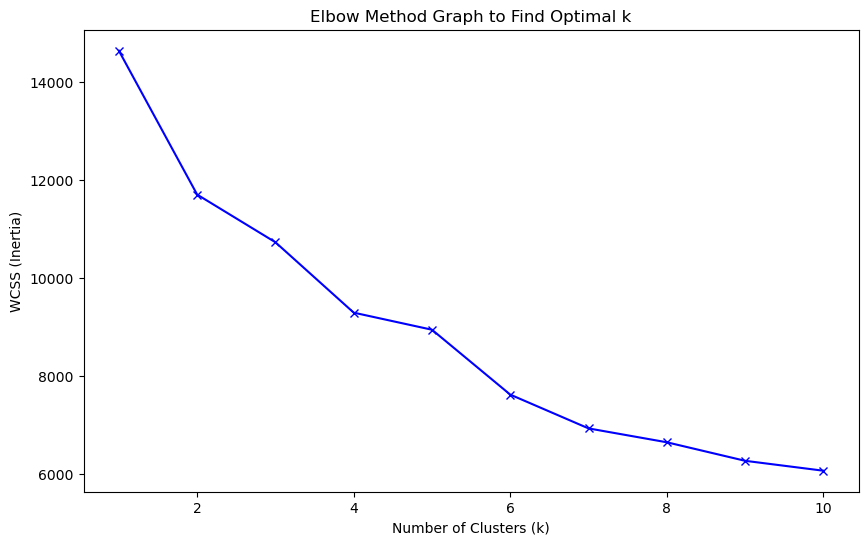

In [185]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for various values of k
wcss = []
k_values = range(1, 11)
for k in k_values: 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Plot elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, "bx-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method Graph to Find Optimal k")
plt.show()

The sharpest flattening out of the graph happens at $k = 4$, making this the clearest elbow point present. Thus, the optimal number of clusters is 4.

# Task 3.7
<i>Perform k-means analysis. Explain the intuition behind each mathematical step.</i>

We will now initialize and run our k-means model with $k = 4$. The mathematical intuition behind these steps has already been explained at length earlier in the document.

In [186]:
# Initialize cluster count
k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans.fit(df)

# Find initial centroids
initial_centroids = kmeans.cluster_centers_

# Assign data points to their nearest centroid
labels = kmeans.labels_

# Update centroids to mean of assigned points
new_centroids = kmeans.cluster_centers_

# Finalize centroids and cluster assignments
final_centroids = kmeans.cluster_centers_
final_labels = kmeans.labels_

Now that the clusters have been established, we will visualize them. PCA is required to reduce the dimensionality of the data down to 2D for visualization purposes.

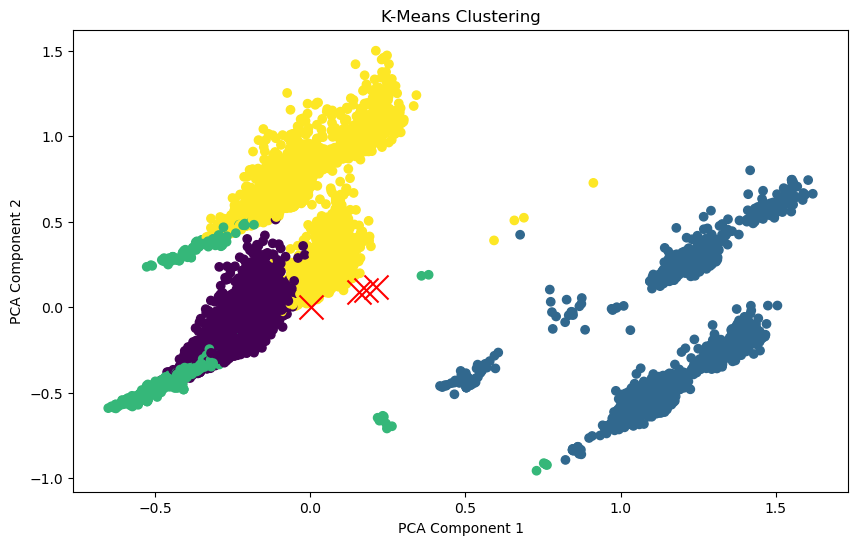

In [187]:
from sklearn.decomposition import PCA

# Reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=final_labels, cmap='viridis', marker='o')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=300, c='red', marker='x')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()

# Task 3.8
<i>Interpret the results in the context of the questions you asked.</i>

The centroids are quite far away from the apparent centers of their respective clusters, indicating a serious issue with the k-means algorithm implementation. However, changing initialization settings and using a different value of $k$ did not fix the issue. Unfortunately, this means the results have limited usefulness in customer segmentation.

# Task 3.9
<i>Discuss how you minimized the variation within the clusters.</i>

I minimized the variation between clusters by starting with the optimal number of clusters $k$, assigning each data point to its optimal cluster, and iteratively recalculating cluster centroids until the inertia (within-cluster sum of squares) was minimized.

# Task 3.10
<i>Validate your model. Then, explain the results.</i>

The most straightforward way to validate the k-means model is using the silhouette score, which measures how similar each data point is to its own cluster versus other clusters. We can use the average silhouette score from all clusters to determine how effective the model is at grouping online shopping sessions. This score can be interpreted as follows: 

* <b>Close to 1:</b> The clusters are well-fit to the data.
* <b>Close to 0:</b> Some of the clusters are overlapping.
* <b>Close to -1:</b> The cluster assignments are wrong.

In [188]:
from sklearn.metrics import silhouette_score

# Find average silhouette score for all data points
avg_silhouette_score = silhouette_score(df, final_labels)
print(f"Silhouette Score: {round(avg_silhouette_score, 2)}")

Silhouette Score: 0.24


The score is close to 0, indicating that there is some overlap between the clusters. This means the model's utility in separating customers into distinct groups is limited, as it is unclear which group many of the online shopping sessions belong to. Ideally, each data point would belong to exactly one cluster, indicating its similarity to others in its cluster alone.

We can also use a metric called the Davies-Bouldin Index to validate the quality of the clusters. It measures the average ratio of intra-cluster distances to inter-cluster distances, with lower values suggesting better clustering.

In [189]:
from sklearn.metrics import davies_bouldin_score

# Recompute labels
labels = kmeans.fit_predict(df)

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(df, labels)
print(f"Davies-Bouldin Index: {round(db_index, 2)}")

Davies-Bouldin Index: 1.72


This DBI indicates that the clusters are of moderate quality. It is not low enough to suggest highly-effective clustering, but it is not absurdly high either. 

# Task 3.11
<i>Include all mathematical formulas used and graphs representing the final outcomes.</i>

All relevant formulas and graphs have been included in their respective tasks.

# References
GeeksforGeeks. (2023, May 10). Elbow Method for optimal value of k in KMeans. GeeksforGeeks. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/ <br>
editor. (2023, March 7). Assumptions can ruin your k-means clusters. Decision Mechanics. https://decisionmechanics.com/assumptions-can-ruin-your-k-means-clusters/ <br>
ChatGPT. (n.d.). https://chat.openai.com/ <br>
Microsoft Copilot in Bing. (n.d.). https://www.bing.com/chat?form=NTPCHB![image.png](attachment:image.png)